## **<font style="color:rgb(134,19,348)">Face Detection using Haar-Cascade</font>**

- Identifying given object in an image is known as object detection. We will use Haar Cascade pre-trained XML files. It's the simplest way to to perform object detection.

- Haar Cascade is a feature-based object detection algorithm to detect objects from images. A cascade function is trained on lots of positive and negative images for detection.

- Haar Cascade can’t be used for face recognition since it only identifies the matching shape and size.

- Haar cascade uses the cascade function and cascading window. It tries to calculate features for every window and classify positive and negative. If the window could be a part of an object, then positive, else, negative.(It's more like binary classifier, as it assigns positive to those cascade windows that can be a part of our object)

- The OpenCV library manages a repository on GitHub for all popular haar cascades pre-trained files that can be used for various object detection tasks, for example:

    - Human face detection
    - Eye detection
    - Vehicle detection
    - Nose / Mouth detection
    - body detection
    - license plate detection

https://github.com/opencv/opencv/tree/master/data/haarcascades

### **<font style="color:rgb(120,120,50)">Steps Breaking Down</font>**

**`face_cascade = cv2.CascadeClassifier(<XML_cascade_path>)`**

This initializes a cascade classifier object using OpenCV's *`CascadeClassifier`* class. A cascade classifier is a machine learning-based model trained to detect objects in images. In this case, this classifier trained specifically to detect human faces. The *`XML_cascade_path`* variable should contain the path to the XML file that defines the cascade classifier model.


**`faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)`**

The primary purpose of detectMultiScale is to detect objects of interest (e.g., faces) at multiple scales within an image. Objects can appear at different sizes due to variations in distance, perspective, or image resolution. By processing the image at multiple scales, the algorithm increases the likelihood of detecting objects of varying sizes.

Internally, detectMultiScale employs a sliding window approach. It moves a rectangular window (often referred to as a "window" or "detector") across the image at different positions and scales. At each position and scale, the classifier evaluates whether the contents of the window resemble the target object (e.g., a face). The classifier is trained to recognize patterns and features indicative of the object being detected.

- *`scaleFactor`*: This parameter specifies how much the feature size is reduced at each feature scale. It helps in the detection of faces at different scales. A smaller scaleFactor value increases the chance of detecting faces but also increases computation time. A value of 1.1 means the algorithm is trying to detect faces at slightly different scales by resizing the input image by 10% at each step.

   

- *`minNeighbors`*: This parameter specifies how many neighbors each candidate rectangle should have to retain it. Higher values result in fewer detections but with higher quality. A lower value will detect more faces but might also include false positives. A value of 5 indicates that a candidate rectangle should have at least 5 neighbors to be considered a valid detection.


In [1]:
import cv2
import matplotlib.pyplot as plt

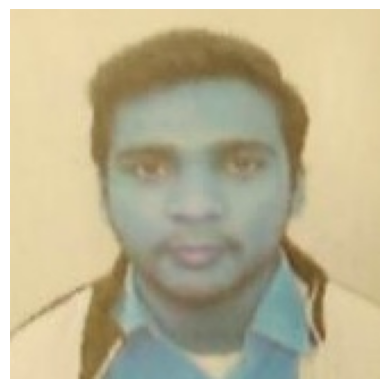

In [2]:
cascade_path = "data\\models\\haarcascade_frontalface_default.xml"
image_path = "data\\02_intermediate_data\\contour_id.jpg"
# Read the image
img = cv2.imread(image_path)

# Convert the image to grayscale (Haar cascade works better with grayscale images)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cascade_path)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

# faces
# Find the face with the largest area
max_area = 0
largest_face = None
for (x, y, w, h) in faces:
    area = w * h
    if area > max_area:
        max_area = area
        largest_face = (x, y, w, h)

# Extract the largest face
if largest_face is not None:
    (x, y, w, h) = largest_face
    # extracted_face = img[y:y+h, x:x+w]
    
    # Increase dimensions by 15%
    new_w = int(w * 1.50)
    new_h = int(h * 1.50)
    
    # Calculate new (x, y) coordinates to keep the center of the face the same
    new_x = max(0, x - int((new_w - w) / 2))
    new_y = max(0, y - int((new_h - h) / 2))

    # Extract the enlarged face
    extracted_face = img[new_y:new_y+new_h, new_x:new_x+new_w]

plt.imshow(extracted_face)
plt.axis('off')
plt.show()

## **<font style="color:rgb(134,19,348)">Face Recognition</font>**

**`Dlib`**: Dlib is a C++ library with Python bindings, known for its excellent face detection and shape prediction capabilities. It also includes a pre-trained face recognition model.

**`Face_recognition`**: This Python library is built on top of dlib and provides a simple API for face recognition tasks. It offers both face detection and recognition functionalities.

In [3]:
import face_recognition

face1 = face_recognition.load_image_file("data\\01_raw_data\\extracted_face.jpg")
face1 = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

face2 = face_recognition.load_image_file("data\\01_raw_data\\extracted_face.jpg")
face2 = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)

face3 = face_recognition.load_image_file("data\\01_raw_data\\bibek_face.jpg")
face3 = cv2.cvtColor(face3, cv2.COLOR_BGR2RGB)

#--Converting image into encodings
face_encode1 = face_recognition.face_encodings(face1)[0]
face_encode2 = face_recognition.face_encodings(face2)[0]
face_encode3 = face_recognition.face_encodings(face3)[0]


In [4]:
print(face_recognition.compare_faces([face_encode1],face_encode2)[0])
print(face_recognition.compare_faces([face_encode3],face_encode2)[0])

True
False
